Covariance matrix:  [[0.00028179 0.00019766]
 [0.00019766 0.00030123]]
Covariance diagonal:  [0.00028179 0.00030123]
Covariance trace:  0.000583023549920278
Correlation matrix:  [[1.00173366 0.70264666]
 [0.70264666 1.0708476 ]]
Correlation coefficient:  [[1.         0.67841747]
 [0.67841747 1.        ]]
Out of sync:  False


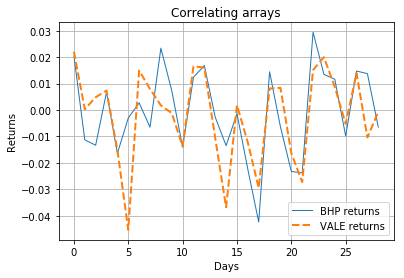

In [10]:
"""
Correlation
"""
import numpy as np
import matplotlib.pyplot as plt

# load the data
bhp  = np.loadtxt('./data/BHP.csv',  delimiter=',', usecols=(6,), unpack=True)
vale = np.loadtxt('./data/VALE.csv', delimiter=',', usecols=(6,), unpack=True)

# stock returns
bhp_returns  = np.diff(bhp)  / bhp[:-1]
vale_returns = np.diff(vale) / vale[:-1]

# covariance
covariance = np.cov(bhp_returns, vale_returns)
cov_diag   = covariance.diagonal()
conv_trace = covariance.trace()
print("Covariance matrix: ", covariance)
print("Covariance diagonal: ", cov_diag)
print("Covariance trace: ", conv_trace)

# the correlation of two vectors is defined as the covariance, divided by the product
# of the respective standard deviations of the vectors.
correlation = covariance / (bhp_returns.std() * vale_returns.std())
print("Correlation matrix: ", correlation)

# the correlation coefficient
correlation_coef =  np.corrcoef(bhp_returns, vale_returns)
print("Correlation coefficient: ", correlation_coef)

# two stocks are considered out of sync if their difference is two standard
# deviations from the mean of the differences.
difference = bhp - vale
avg  = np.mean(difference)
dev  = np.std(difference)
sync = np.abs(difference[-1] - avg) > 2 * dev
print("Out of sync: ", sync)

# plot
t = np.arange(len(bhp_returns))

plt.plot(t, bhp_returns, lw=1, label='BHP returns')
plt.plot(t, vale_returns, '--', lw=2, label='VALE returns')
plt.title('Correlating arrays')

plt.xlabel('Days')
plt.ylabel('Returns')
plt.grid()
plt.legend(loc='best')
plt.show()

Polynomial fit [ 1.11655581e-03 -5.28581762e-02  5.80684638e-01  5.79791202e+01]
Next value:  57.97430760810069
Roots:  [ 35.48624287+30.62717062j  35.48624287-30.62717062j
 -23.63210575 +0.j        ]
Derivative:  [ 0.00334967 -0.10571635  0.58068464]
Extremas:  [24.47820054  7.08205278]
max:  7
min:  24


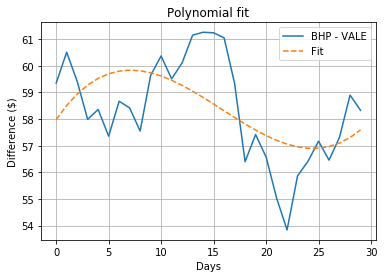

In [19]:
"""
Fitting to polynomials
"""

# load the data
bhp  = np.loadtxt('./data/BHP.csv',  delimiter=',', usecols=(6,), unpack=True)
vale = np.loadtxt('./data/VALE.csv', delimiter=',', usecols=(6,), unpack=True)

# the NumPy polyfit() function fits a set of data points to a polynomial, even if the underlying function is not continuous
t = np.arange(len(bhp))
poly = np.polyfit(t, bhp - vale, 3)

# the coefficients of the polynomial
print("Polynomial fit", poly)

# extrapolate to the next value with the polyval() function and the polynomial object that we got from the fit
next_value = np.polyval(poly, t[-1] + 1)
print("Next value: ", next_value)

#  find out when our polynomial fit reaches zero with the roots() function
roots = np.roots(poly)
print("Roots: ", roots)

# find extrema—these could be potential maxima or minima, and these are the
# points where the derivative of our function is zero
der = np.polyder(poly)
print("Derivative: ", der)

# get the roots of the derivatives
print("Extremas: ", np.roots(der))

# find the maximum and minimum values
vals = np.polyval(poly, t)
print("max: ", np.argmax(vals))
print("min: ", np.argmin(vals))

# plit
plt.plot(t, bhp - vale, label='BHP - VALE')
plt.plot(t, vals, '--', label='Fit')
plt.title('Polynomial fit')
plt.xlabel('Days')
plt.ylabel('Difference ($)')
plt.grid()
plt.legend()
plt.show()

In [25]:
"""
Balancing Volumne
"""

# load data
c, v = np.loadtxt('./data/BHP.csv', delimiter=',', usecols=(6, 7), unpack=True)

# calculate the absolute value changes
change = np.diff(c)
print('value: ', c,      len(c))
print('diffs:  ', change, len(change))

# the NumPy sign() function returns the signs for each element in an array. -1 is
# returned for a negative number, 1 for a positive number, and 0, otherwise. 
signs = np.sign(change)
print("Signs", signs)

# the piecewise() function evaluates a function piece-by-piece
pieces = np.piecewise(change, [change < 0, change > 0], [-1, 1])
print("Pieces", pieces)

# check the output is same
print("Arrays equal?", np.array_equal(signs, pieces))

# the on-balance volume depends on the change of the previous close, so we cannot
# calculate it for the first day in our sample
print("On balance volume", v[1:] * signs)

value:  [93.72 95.64 94.56 93.3  93.93 92.39 92.11 92.36 91.76 93.91 94.6  93.27
 94.43 96.02 95.76 94.47 94.34 92.22 88.31 89.59 89.02 86.95 84.88 87.38
 88.56 89.59 88.71 90.02 91.26 90.67] 30
diffs:   [ 1.92 -1.08 -1.26  0.63 -1.54 -0.28  0.25 -0.6   2.15  0.69 -1.33  1.16
  1.59 -0.26 -1.29 -0.13 -2.12 -3.91  1.28 -0.57 -2.07 -2.07  2.5   1.18
  1.03 -0.88  1.31  1.24 -0.59] 29
Signs [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
Pieces [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
Arrays equal? True
On balance volume [ 2620800. -2461300. -3270900.  2650200. -4667300. -5359800.  7768400.
 -4799100.  3448300.  4719800. -3898900.  3727700.  3379400. -2463900.
 -3590900. -3805000. -3271700. -5507800.  2996800. -3434800. -5008300.
 -7809799.  3947100.  3809700.  3098200. -3500200.  4285600.  3918800.
 -3632200.]
